In [67]:
from selenium import webdriver
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Importing Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Here data contains the details of medical cost insurance which is in form of numerical data and categorical data. Here charges is a target variable 

# Exploratory Data Analysis (EDA)

In [3]:
#checking rows and columns of data set
df.shape

(1338, 7)

There are 1338 rows and 7 columns out of which 1 is target variable and remaining 6 are independent variables.

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are 3 types of data types present(float 64, int64, object) in the data.

In [6]:
# to check null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null values are present

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see there are no null values present in data 

In [10]:
df['charges'].unique() 

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

We see data is unique here thats why it is continous 

In [11]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

We see that sex, smoker, region have 2, 2 and 4 unique values respectively. So we have to treat them 

In [14]:
df['charges'].nunique()

1337

In charges there are total 1337 unique values 

In [68]:
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [15]:
# to check number of unique values in each column
df.nunique().to_frame('No of unique values')

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [17]:
df.loc[df['charges']==" "]

,age,sex,bmi,children,smoker,region,charges


so no blank spaces are present in charges

# Describing a data Set

In [18]:
# statistical description of data set
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The statistical description is only for numerical data and not for categorical data.
The summary of data set look perfect as there is no invalid data.
We can observe following points 
1) There is no missing values as count of all column is equal.

# Data Visualisation

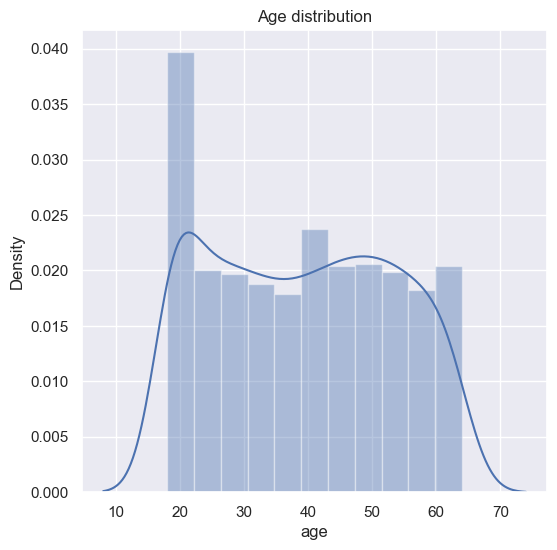

In [20]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

As we can see most of density is in age group from 20 to 23

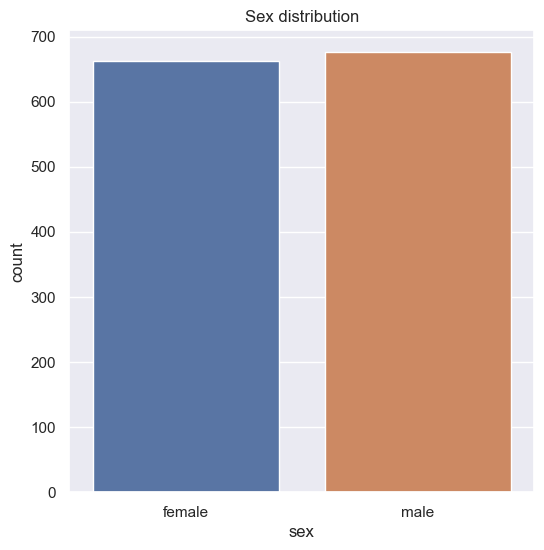

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex distribution')
plt.show()

As we can see both columns are almost same in count 

In [23]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

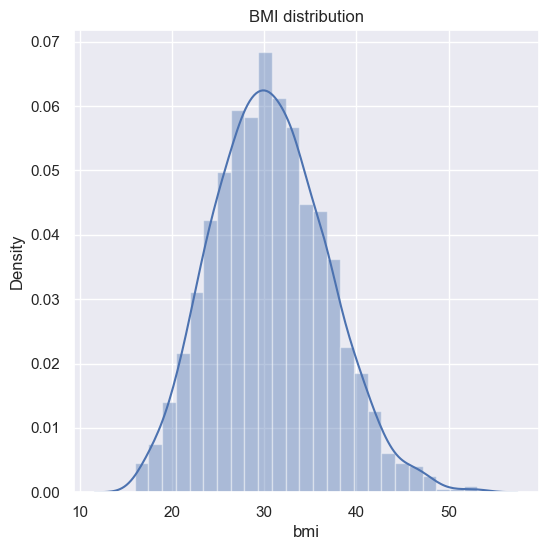

In [25]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI distribution')
plt.show()

As we can see BMI is distributted evenly. Also more number of peoples have BMI in range of 30 to 35

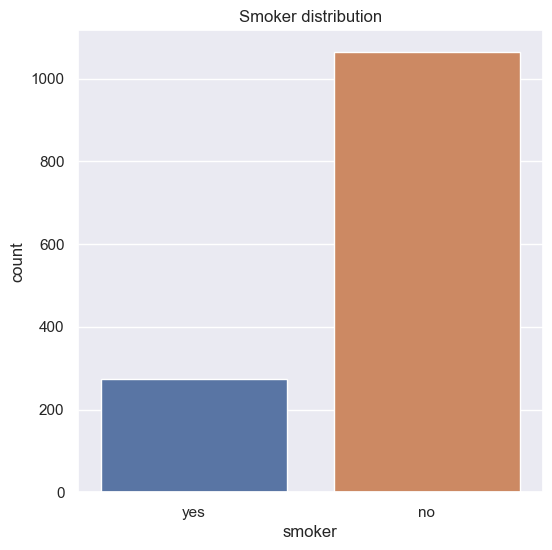

no     1064
yes     274
Name: smoker, dtype: int64

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker distribution')
plt.show()
df['smoker'].value_counts()

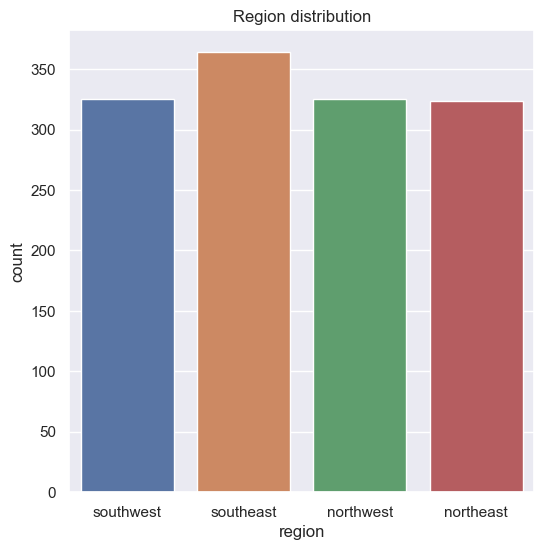

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region distribution')
plt.show()
df['region'].value_counts()

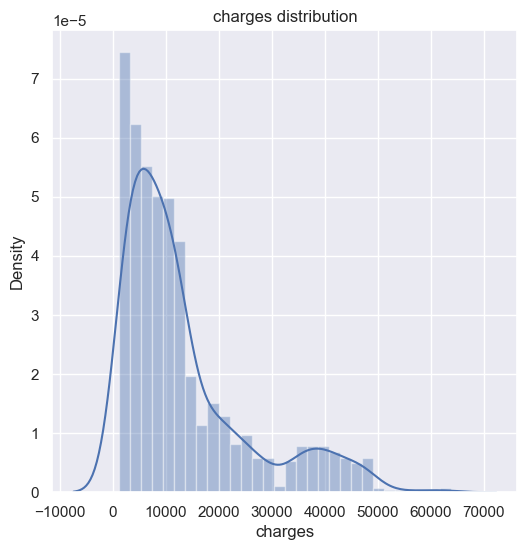

In [29]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('charges distribution')
plt.show()

# Data Pre Processing

### Encoding the categorical features

In [30]:
# encoding sex column
df.replace({'sex':{'male':0, 'female':1}},inplace=True)

# encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

# encoding region column
df.replace({'region':{'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}},inplace=True)

In [31]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,1,1629.83350
1336,21,1,25.800,0,1,0,2007.94500


### Splitting target and features

In [33]:
x=df.drop(columns='charges',axis=1)

In [36]:
y=df['charges']

In [38]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Training and Testing Data

In [79]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [80]:
print(x.shape, X_train.shape, X_test.shape)

(1338, 6) (1003, 6) (335, 6)


In [81]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [82]:
lr.fit(X_train,Y_train)

LinearRegression()

In [83]:

pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
r2_train=metrics.r2_score(y_train,pred_train)
print('R squared train value is',r2_train)
r2_test=metrics.r2_score(y_test,pred_test)
print('R squared test value is',r2_test)


R squared train value is -0.6581741158166723
R squared test value is -0.582552455451659


In [84]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
5,31,1,25.740,0,1,1,3756.62160
6,46,1,33.440,1,1,1,8240.58960
7,37,1,27.740,3,1,2,7281.50560
8,37,0,29.830,2,1,3,6406.41070
9,60,1,25.840,0,1,2,28923.13692


In [85]:
input_data=(27,0,42.130,0,0,1)

In [86]:
npa=np.array(input_data)
input_data_reshaped=npa.reshape(1,-1)
predict=lr.predict(input_data_reshaped)
print(predict)

[32036.30871783]
